In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('lab_vehicle.csv')

In [ ]:
df.head()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [ ]:
df.describe()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO'
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
print(df.isnull().sum())

COMPACTNESS                    0
CIRCULARITY                    0
'DISTANCE CIRCULARITY'         0
'RADIUS RATIO'                 0
'PR.AXIS ASPECT RATIO'         0
'MAX.LENGTH ASPECT RATIO'      0
'SCATTER RATIO'                0
ELONGATEDNESS                  0
'PR.AXIS RECTANGULARITY'       0
'MAX.LENGTH RECTANGULARITY'    0
'SCALED VARIANCE_MAJOR'        0
'SCALED VARIANCE_MINOR'        0
'SCALED RADIUS OF GYRATION'    0
'SKEWNESS ABOUT_MAJOR'         0
'SKEWNESS ABOUT_MINOR'         0
'KURTOSIS ABOUT_MAJOR'         0
'KURTOSIS ABOUT_MINOR'         0
'HOLLOWS RATIO'                0
dtype: int64


In [ ]:
def euclidean_distance(a, b):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))

In [ ]:
def kmeans(data, k, max_iter=100):

    #Converting data to list
    points = data.values.tolist()

    #Taking any k points for centroid
    centroids = random.sample(points, k)

    for _ in range(max_iter):
        # khali array banaya hai k clusters k liye
        clusters = [[] for _ in range(k)]
        assignments = []
        for point in points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(point)
            assignments.append(cluster_idx)

        # Update centroids
        new_centroids = []
        for cluster in clusters:
            if cluster:  # if cluster is not empty (happens for 1st iteration)
                """
                cluster = [
                  [1.2, 3.4],  # Point 1
                  [1.8, 2.9],  # Point 2
                  [1.5, 3.1]   # Point 3
                ]
                """

                new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
                new_centroids.append(new_centroid)
            else:
                # If it is empty then jo centroid aye hen wahi daldo for 1st iteration
                new_centroids.append(centroids[clusters.index(cluster)])

        # Check for convergence like k pichle clusters or isme koi fark hai k nahi
        if all(euclidean_distance(old, new) < 0.001
               for old, new in zip(centroids, new_centroids)):
            break

        centroids = new_centroids

    # Calculating WCSS
    wcss = 0
    for i, centroid in enumerate(centroids):
        for point in clusters[i]:
            wcss += euclidean_distance(point, centroid) ** 2

    return centroids, assignments, wcss

In [ ]:
def elbow_method(data, max_k=10):
    wcss_values = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        _, _, wcss = kmeans(data, k)
        wcss_values.append(wcss)
        print(f"k = {k}, WCSS = {wcss:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss_values, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method for Optimal k')
    plt.grid()
    plt.show()


k = 1, WCSS = 30809395.35
k = 2, WCSS = 7290881.41
k = 3, WCSS = 4875185.38
k = 4, WCSS = 3555855.36
k = 5, WCSS = 2923142.52
k = 6, WCSS = 1889373.53
k = 7, WCSS = 1747314.25
k = 8, WCSS = 1566569.89
k = 9, WCSS = 1399147.79
k = 10, WCSS = 1276898.57


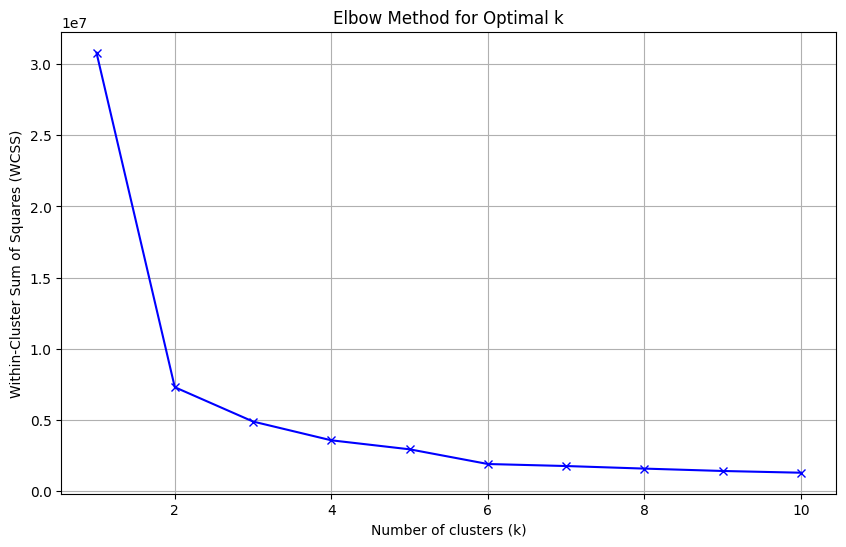

In [ ]:
elbow_method(df)

In [ ]:
k = 2
print(k)

2


In [ ]:
centroids, assignments, wcss = kmeans(df, k)

In [ ]:
df['Cluster'] = assignments

In [ ]:
df.head()

,COMPACTNESS,CIRCULARITY,'DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO','SCATTER RATIO',ELONGATEDNESS,'PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE_MAJOR','SCALED VARIANCE_MINOR','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT_MAJOR','SKEWNESS ABOUT_MINOR','KURTOSIS ABOUT_MAJOR','KURTOSIS ABOUT_MINOR','HOLLOWS RATIO',Cluster
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,1
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,1
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,0
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,1
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,1


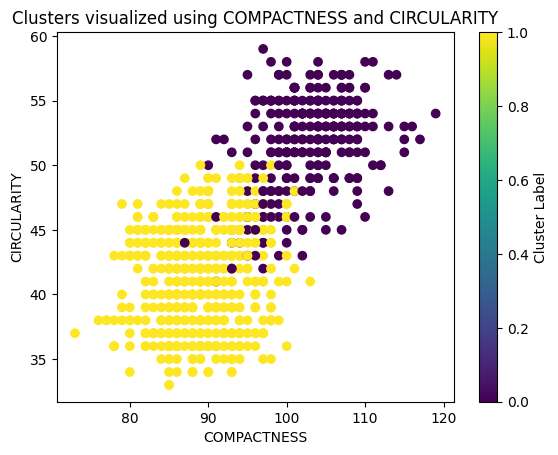

In [ ]:
import matplotlib.pyplot as plt

x_feature = df.columns[0]
y_feature = df.columns[1]


scatter = plt.scatter(df[x_feature], df[y_feature], c=df['Cluster'])
plt.title(f'Clusters visualized using {x_feature} and {y_feature}')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.colorbar(scatter, label='Cluster Label')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.drop('Cluster', axis=1), assignments)
print(f"The average silhouette score is : {silhouette_avg}")


The average silhouette score is : 0.6735098638013705
